In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.linalg import toeplitz
from scipy import linalg, signal
from utility import hamming_window, autocorrelacao, pitch, ganho, correct_pitch

32767


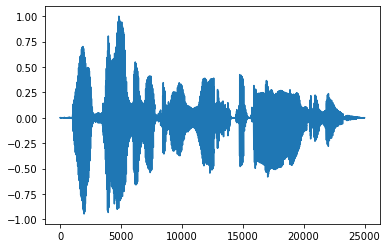

In [41]:
wa = 256
ws = 160
pf=146
thu = 0.45
p = 10
mu = .95

dirak = np.zeros(512)
dirak[0] = 1

sinal = read("./resources/car_nor.wav")[1]
print(max(sinal))
sinal = sinal/max(sinal)

plt.plot(sinal)
plt.show()

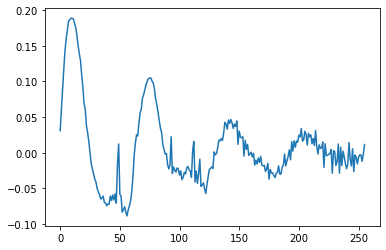

In [42]:
ni = 2560
plt.plot(sinal[ni:ni+wa])
plt.show()

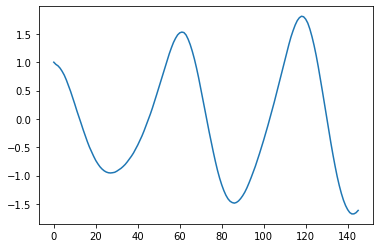

Energia:  0.8149547391187666


In [43]:
r, e, n_r = autocorrelacao(sinal, wa, ni, pf)

plt.plot(r)
plt.show()

print("Energia: ", e)

In [44]:
v = pitch(r, e, 5, thu, debug=True)

Valor: 118
Valor Minimo: 54 | Valor Maximo: 64
Novos valores:  61 1.5311406472689904
Valor do pitch: 61


In [45]:

vibrations = np.zeros(int(len(sinal)/ws)+1)
energy = np.zeros(int(len(sinal)/ws)+1)
gain = np.zeros(int(len(sinal)/ws)+1)

for i in range(0,int((len(sinal)-256)/ws)):
    r, e, n_r = autocorrelacao(sinal, wa, i*ws, pf)
    vibrations[i] = pitch(r,e, 5, thu)
    energy[i] = e

    m = toeplitz(r[:p])
    mr = np.array(r[1:p+1])*-1
    minv = linalg.inv(m)
    a = np.dot(mr,minv)

    gain[i] = ganho(n_r, a, p)

Valor do pitch: 0
Valor do pitch: 63
Valor do pitch: 63
Valor do pitch: 64
Valor do pitch: 62
Valor do pitch: 59
Valor do pitch: 55
Valor do pitch: 53
Valor do pitch: 53
Valor do pitch: 52
Valor do pitch: 55
Valor do pitch: 61
Valor do pitch: 62
Valor do pitch: 0
Valor do pitch: 0
Valor do pitch: 0
Valor do pitch: 57
Valor do pitch: 57
Valor do pitch: 55
Valor do pitch: 54
Valor do pitch: 55
Valor do pitch: 56
Valor do pitch: 57
Valor do pitch: 58
Valor do pitch: 60
Valor do pitch: 61
Valor do pitch: 63
Valor do pitch: 63
Valor do pitch: 64
Valor do pitch: 69
Valor do pitch: 68
Valor do pitch: 66
Valor do pitch: 63
Valor do pitch: 63
Valor do pitch: 64
Valor do pitch: 67
Valor do pitch: 68
Valor do pitch: 65
Valor do pitch: 63
Valor do pitch: 63
Valor do pitch: 63
Valor do pitch: 64
Valor do pitch: 65
Valor do pitch: 70
Valor do pitch: 0
Valor do pitch: 0
Valor do pitch: 0
Valor do pitch: 64
Valor do pitch: 66
Valor do pitch: 72
Valor do pitch: 71
Valor do pitch: 67
Valor do pitch: 68


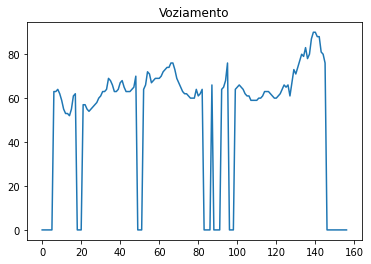

In [46]:
plt.title("Voziamento")
plt.plot(vibrations)
plt.show()

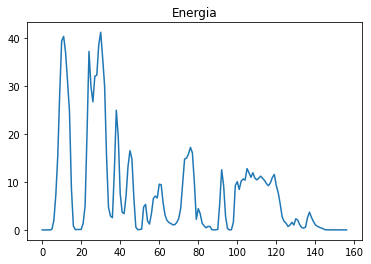

In [47]:
plt.title("Energia")
plt.plot(energy)
plt.show()

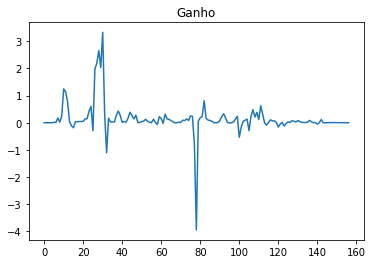

In [48]:
plt.title("Ganho")
plt.plot(gain)
plt.show()

Corrigir o voziamento

In [49]:
correct_pitch(vibrations)

Corrigido
Corrigido
Corrigido
Corrigido


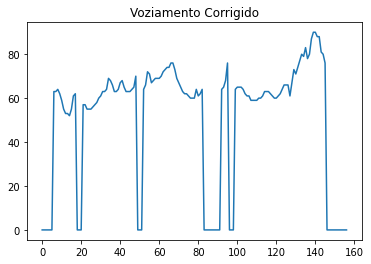

In [50]:
plt.title("Voziamento Corrigido")
plt.plot(vibrations)
plt.show()

Valor do pitch: 61
a:  [-1.85768729  1.20104843 -0.25942106 -0.65961643  1.0287224  -0.31769343
 -0.53970939  0.91671599 -0.63557295  0.18259497]
ganho: 0.3682465815719985


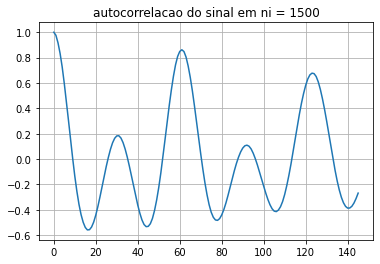

0.3682465815719985


In [51]:
r, e, n_r = autocorrelacao(sinal, wa, 1500, pf)
vibrations = pitch(r,e, 5, thu)
energy = e

m = toeplitz(r[:p])
mr = np.array(r[1:p+1])*-1
minv = linalg.inv(m)
a = np.dot(mr,minv)
gain = ganho(n_r, a, p)

print("a: ", a)
print("ganho:", gain)

plt.title('autocorrelacao do sinal em ni = 1500')
plt.plot(r)
plt.grid(True)
plt.show()

print(gain)

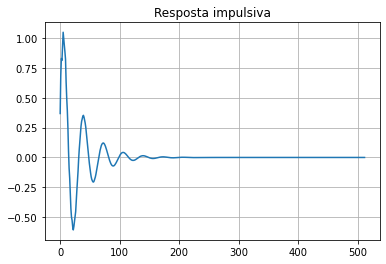

In [52]:

resposta_impulsiva = signal.lfilter([gain], np.hstack(([1], a)), dirak)
plt.title('Resposta impulsiva')
plt.plot(resposta_impulsiva)
plt.grid(True)
plt.show()


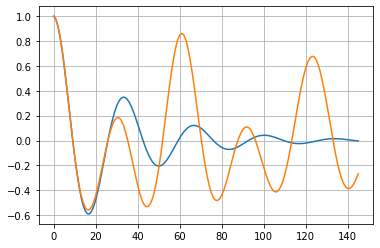

In [53]:
r_ri, e_ri, n_r_ri = autocorrelacao(resposta_impulsiva, wa, 0, pf)

plt.plot(r_ri)
plt.plot(r)
plt.grid(True)
plt.show()

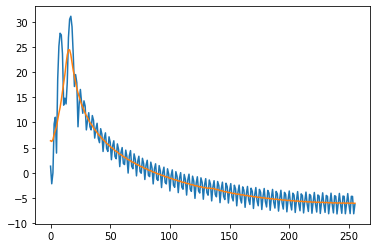

In [54]:
_r = 20*np.log10(np.abs(np.fft.fft(r, 512)))
_n_r = 20*np.log10(np.abs(np.fft.fft(r_ri, 512)))

plt.plot(_r[:int(len(_r)/2)])
plt.plot(_n_r[:int(len(_n_r)/2)])
plt.show()